#Prostate Cancer vs. Breast Cancer

####The original goal of our PathFX analysis was to determine whether any of the top 5 most commonly prescribed cardiovascular, endocrine, respiratory, and gastrointestinal drugs could be repurposed for prostate cancer related purposes. However, after analyzing a few drugs through PathFX, we noticed that prostate cancer was not showing up as a resulting phenotypic target. We decided to take a step back to understand how many prostate cancer related proteins are actaully drug targets and to see if we should focus on another phenotype such as breast cancer. 

All data used in this analysis is from the UniProt database: https://www.uniprot.org/

In [ ]:
#downloading necessary packages
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Here I analyze all of the proteins associated with prostate cancer according to the UniProt database. The proteins here were obtained from UniProt using the search term "prostate cancer". All of the drugs (identified by DrugBank database IDs) that target each protein (as determined by UniProt) were counted.


In [ ]:
#reading the csv file that contains the list of prostate cancer proteins, their annotation scores, and the drugs that target them 

prostate_df = pd.read_csv('prostate_cancer_proteins.csv')
#prostate_df.head()
prostate_df.tail()

,Entry,Entry name,Status,Annotation,Cross-reference (DrugBank)
876,D5L9L0,D5L9L0_9GAMR,unreviewed,1 out of 5,NaN
877,F2QL67,F2QL67_9GAMR,unreviewed,1 out of 5,NaN
878,F4ZL01,F4ZL01_9GAMR,unreviewed,1 out of 5,NaN
879,F2QL74,F2QL74_9GAMR,unreviewed,2 out of 5,NaN
880,F2QL71,F2QL71_9GAMR,unreviewed,1 out of 5,NaN


In [ ]:
#this function will be used to obtain the counts for the number of drugs that target each protein

def filterInfo(text):

    #splitting up the list 
    split_array = nltk.word_tokenize(text)
    
    counter = 0

    KEYWORD_IGNORE = [';']

    for word in split_array:

        #if the word is not a semicolon, increase counter by a value of 1
        if not (word in KEYWORD_IGNORE):
          counter = counter + 1
          

    return counter

In [ ]:
#double checking that the function is doing the right thing

sample = ('DB05351;DB00736;DB00448;DB00338;DB00213;DB13620;DB01129;')

filter(sample)


7

In [ ]:
#creating a new dataframe that only contains the proteins that are drug targets 
prostate_wDrugs = prostate_df.dropna()

#counting the number of drugs that target each of the proteins in this dataframe
for index in prostate_wDrugs.index:
    prostate_wDrugs.loc[index, "Number of Drugs"] = filterInfo(prostate_df.loc[index, "Cross-reference (DrugBank)"])

print(prostate_wDrugs)

      Entry  ... Number of Drugs
4    Q96Q83  ...             1.0
13   P10275  ...            82.0
14   O96017  ...             3.0
15   P29323  ...             2.0
20   Q7Z2W7  ...             7.0
..      ...  ...             ...
739  P36897  ...             7.0
740  Q15746  ...             1.0
745  P67775  ...             3.0
749  Q92781  ...             2.0
756  P27169  ...            10.0

[86 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
#calculating the relative siginficance of the values above using z scores
prostate_wDrugs["ZScores"] = stats.zscore(prostate_wDrugs["Number of Drugs"])

print(prostate_wDrugs)

      Entry   Entry name  ... Number of Drugs   ZScores
4    Q96Q83  ALKB3_HUMAN  ...             1.0 -0.374529
13   P10275   ANDR_HUMAN  ...            82.0  2.927964
14   O96017   CHK2_HUMAN  ...             3.0 -0.292986
15   P29323  EPHB2_HUMAN  ...             2.0 -0.333758
20   Q7Z2W7  TRPM8_HUMAN  ...             7.0 -0.129900
..      ...          ...  ...             ...       ...
739  P36897  TGFR1_HUMAN  ...             7.0 -0.129900
740  Q15746   MYLK_HUMAN  ...             1.0 -0.374529
745  P67775  PP2AA_HUMAN  ...             3.0 -0.292986
749  Q92781   RDH5_HUMAN  ...             2.0 -0.333758
756  P27169   PON1_HUMAN  ...            10.0 -0.007585

[86 rows x 7 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#obtaining all of the "number of drugs"

prostate_numDrugs = pd.DataFrame()
prostate_numDrugs = prostate_wDrugs["Number of Drugs"]

prostate_numDrugs = prostate_numDrugs.to_numpy()
print(prostate_numDrugs)


[  1.  82.   3.   2.   7.   1.   1.  10.  13.   1.   1.  22.   1.   1.
   3.   3.  19.   1.   2.   4.   5.  21.   1.   1.   5.   1.  10.  15.
 198.   1.   1.   5.  24.   1.   4.   1.   2.   5.  15.   1.   5.   1.
   1.  57.  59.   9.  24.  21.   2.   1.   6.   8.   1.   1.   4.   1.
  49.   1.   4.   1.  22.   2.   3.  19.   3.   1.   1.   6.  11.   1.
   2.   1.   3.   1.   2.  13.   1.   3.   1.   1.   5.   7.   1.   3.
   2.  10.]


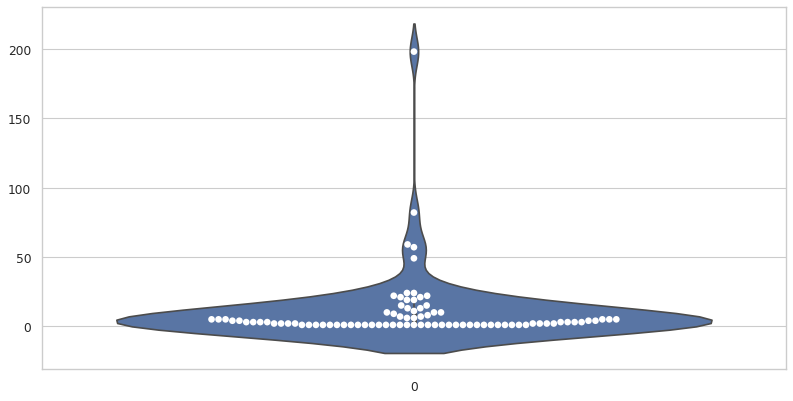

In [ ]:
#plotting all of the "number of drugs" onto a violin plot

sns.set_theme(style="whitegrid")
figure(figsize=(12, 6), dpi=80)
ax = sns.violinplot(data=prostate_numDrugs)
sns.swarmplot(data=prostate_numDrugs, color="white", edgecolor="gray", size=6)

In [ ]:
#obtaining z scores
prostate_zscores = pd.DataFrame()
prostate_zscores = prostate_wDrugs["ZScores"]

p_zscores = prostate_zscores.to_numpy()
print(p_zscores)


[-3.74529078e-01  2.92796403e+00 -2.92986038e-01 -3.33757558e-01
 -1.29899959e-01 -3.74529078e-01 -3.74529078e-01 -7.58539905e-03
  1.14729161e-01 -3.74529078e-01 -3.74529078e-01  4.81672839e-01
 -3.74529078e-01 -3.74529078e-01 -2.92986038e-01 -2.92986038e-01
  3.59358280e-01 -3.74529078e-01 -3.33757558e-01 -2.52214518e-01
 -2.11442998e-01  4.40901320e-01 -3.74529078e-01 -3.74529078e-01
 -2.11442998e-01 -3.74529078e-01 -7.58539905e-03  1.96272200e-01
  7.65746034e+00 -3.74529078e-01 -3.74529078e-01 -2.11442998e-01
  5.63215879e-01 -3.74529078e-01 -2.52214518e-01 -3.74529078e-01
 -3.33757558e-01 -2.11442998e-01  1.96272200e-01 -3.74529078e-01
 -2.11442998e-01 -3.74529078e-01 -3.74529078e-01  1.90867603e+00
  1.99021907e+00 -4.83569189e-02  5.63215879e-01  4.40901320e-01
 -3.33757558e-01 -3.74529078e-01 -1.70671479e-01 -8.91284388e-02
 -3.74529078e-01 -3.74529078e-01 -2.52214518e-01 -3.74529078e-01
  1.58250388e+00 -3.74529078e-01 -2.52214518e-01 -3.74529078e-01
  4.81672839e-01 -3.33757

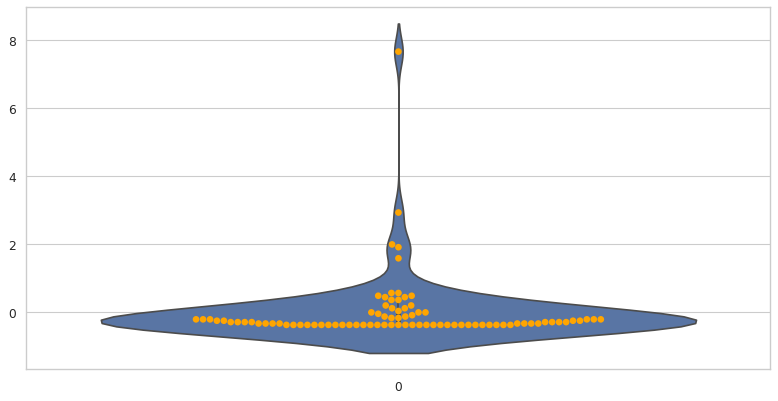

In [ ]:
#plotting all of the zscores onto a violin plot

sns.set_theme(style="whitegrid")
figure(figsize=(12, 6), dpi=80)
ax = sns.violinplot(data=p_zscores)
sns.swarmplot(data=p_zscores, color="orange", edgecolor="gray", size=6)


In [ ]:
#obtaining the number of prostate cancer related proteins that were target by drugs

len(p_zscores)

86

86 of the 881 proteins related to prostate cancer, as indicated by UniProt, are targeted by drugs (as determined by UniProt's method). I wonder how many of these 86 proteins have an "unreviewed" status as determined by UniProt.

In [ ]:
#this code prints out each protein that is a srug target and their "reviewed" or "unreviewed" status
for index, row in prostate_wDrugs.iterrows():
    print(row['Entry'], row['Status'])

Q96Q83 reviewed
P10275 reviewed
O96017 reviewed
P29323 reviewed
Q7Z2W7 reviewed
P60484 reviewed
B4DP61 unreviewed
P31213 reviewed
P00747 reviewed
Q9UEW8 reviewed
O95470 reviewed
P11473 reviewed
Q8TC12 reviewed
Q15942 reviewed
Q9H1D0 reviewed
P13693 reviewed
P15692 reviewed
O14727 reviewed
P51813 reviewed
Q05397 reviewed
P11021 reviewed
P08069 reviewed
P35222 reviewed
Q5T601 reviewed
P22455 reviewed
O00238 reviewed
P31749 reviewed
P05093 reviewed
Q9UNQ0 reviewed
P12644 reviewed
P07332 reviewed
Q14289 reviewed
P00813 reviewed
P49760 reviewed
Q07912 reviewed
P46940 reviewed
P17936 reviewed
Q04609 reviewed
P08238 reviewed
Q16270 reviewed
P10909 reviewed
P16591 reviewed
P17844 reviewed
P27487 reviewed
Q92731 reviewed
P07203 reviewed
P49841 reviewed
P10721 reviewed
P12814 reviewed
Q9BY66 reviewed
P05412 reviewed
Q99527 reviewed
P13861 reviewed
Q05209 reviewed
P11717 reviewed
Q16512 reviewed
P07900 reviewed
O75747 reviewed
Q02156 reviewed
O95665 reviewed
P11309 reviewed
Q92993 reviewed
O00264

In [ ]:
#counting how many unreviewed proteins are drug targets
counter = 0;

for index, row in prostate_wDrugs.iterrows():

  if(row["Status"] == "unreviewed"):

    counter = counter + 1;
    #print(row["Entry"])

print("This is how many prostate cancer related proteins with an unreviewed status are drug targets: ")
print(counter)

B4DP61
This is how many prostate cancer related proteins with an unreviewed status are drug targets: 
1


In [ ]:
#counting how many prostate cancer related proteins have "unreviewed" status
counting = 0;

for index, row in prostate_df.iterrows():

  if(row["Status"] == "unreviewed"):
    counting = counting + 1;

print("This is how many prostate cancer related proteins have a status of unreviewed: ")
print(counting)

This is how many prostate cancer related proteins have a status of unreviewed: 
439


In [ ]:
#counting how many prostate cancer related proteins have "reviewed" status
counts = 0;

for index, row in prostate_df.iterrows():

  if(row["Status"] == "reviewed"):
    counts = counts + 1;

print("This is how many prostate cancer related proteins have a status of reviewed: ")
print(counts)

This is how many prostate cancer related proteins have a status of reviewed: 
442


Because 86 prostate cancer proteins are drug targets and 442 prostate cancer proteins have a status of "reviewed", it does not seem like there is a strong correlation between "reviewed" status and whether or not a protein is a drug target. However, now I am a bit curious about these proteins' annotation scores. 

In [ ]:
#I want to know how many proteins that were determined to be drug targets have an annotation score of less than 5

how_much = 0;

for index, row in prostate_wDrugs.iterrows():

  if not (row["Annotation"] == "5 out of 5"):
    how_much = how_much + 1;
    #print(row["Entry"])

print("This is how many prostate cancer related proteins that are drug targets have an annotation score of less than 5: ")
print(how_much)

B4DP61
This is how many prostate cancer related proteins that are drug targets have an annotation score of less than 5: 
1


In [ ]:
#creating an easier way to check if a protein is targeted by drugs or not
prostate_df.loc[prostate_df["Cross-reference (DrugBank)"].isnull(),'value_is_NaN'] = 'Yes'
prostate_df.loc[prostate_df["Cross-reference (DrugBank)"].notnull(),'value_is_NaN'] = 'No'

print (prostate_df)

      Entry    Entry name  ... Cross-reference (DrugBank) value_is_NaN
0    Q8NFT2   STEA2_HUMAN  ...                        NaN          Yes
1    Q9BQ52    RNZ2_HUMAN  ...                        NaN          Yes
2    O75387    LAT3_HUMAN  ...                        NaN          Yes
3    Q6IWH7    ANO7_HUMAN  ...                        NaN          Yes
4    Q96Q83   ALKB3_HUMAN  ...                   DB00126;           No
..      ...           ...  ...                        ...          ...
876  D5L9L0  D5L9L0_9GAMR  ...                        NaN          Yes
877  F2QL67  F2QL67_9GAMR  ...                        NaN          Yes
878  F4ZL01  F4ZL01_9GAMR  ...                        NaN          Yes
879  F2QL74  F2QL74_9GAMR  ...                        NaN          Yes
880  F2QL71  F2QL71_9GAMR  ...                        NaN          Yes

[881 rows x 6 columns]


In [ ]:
#I want to know how many proteins that were not determined to be drug targets have an annotation score of less than 5

how_many = 0;
not_a_target = 0;

for index, row in prostate_df.iterrows():

  if (row["value_is_NaN"] == "Yes") and not (row["Annotation"] == "5 out of 5"):
    how_many = how_many + 1;

  if(row["value_is_NaN"] == "Yes"):
    not_a_target = not_a_target + 1;

print("This is how many prostate cancer related proteins that are not drug targets that have an annotation score of less than 5: ")
print(how_many)

print("This is how many prostate cancer related proteins are not drug targets: ")
print(not_a_target)

This is how many prostate cancer related proteins that are not drug targets that have an annotation score of less than 5: 
521
This is how many prostate cancer related proteins are not drug targets: 
795


This means that there is a pretty strong correlation between proteins that have an annotation score less than 5 and their status as a protein that is targeted by drugs. However, this not not mean that proteins with a "5 out of 5" annotation score will be a drug target. 

Furthermore, I found it interesting that there is one protein that is a drug target but has an annotation score of less than 5. This means that this protein has been studied enough to be identified as a protein target but for some reason it just doesn't have a high annotation score. Since this is case for only 1 protein, this may just be an outlier (or it could be something to look deeper into in a future analysis). 


###Here I analyze all of the proteins and drugs associated with breast cancer according to the UniProt databases. The proteins here were obtained from UniProt using the search term "breast cancer". All of the drugs (identified by DrugBank database IDs) that target each protein (as determined by UniProt) were counted.

In [ ]:
#reading the csv file

breast_df = pd.read_csv('breast_cancerproteins.csv')

breast_df.tail()

,Entry,Entry name,Status,Protein names,Cross-reference (DrugBank),Annotation
8020,A0A172S1I6,A0A172S1I6_MMTV,unreviewed,Envelope polyprotein (Fragment),NaN,1 out of 5
8021,D3G8F5,D3G8F5_MMTV,unreviewed,Envelope glycoprotein (Fragment),NaN,1 out of 5
8022,A0A172S1C9,A0A172S1C9_MMTV,unreviewed,Envelope polyprotein (Fragment),NaN,1 out of 5
8023,Q2HXY5,Q2HXY5_MMTV,unreviewed,Envelope glycoprotein (Fragment),NaN,1 out of 5
8024,D3G8F4,D3G8F4_MMTV,unreviewed,Envelope glycoprotein (Fragment),NaN,1 out of 5


In [ ]:
#creating a new dataframe that only contains the proteins that are drug targets
breast_wDrugs = breast_df.dropna()

#counting the number of drugs that target each of the proteins in this dataframe
for index in breast_wDrugs.index:
     breast_wDrugs.loc[index, "Number of Drugs"] = filterInfo(breast_df.loc[index, "Cross-reference (DrugBank)"])

print(breast_wDrugs)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


       Entry   Entry name  ...  Annotation Number of Drugs
2     Q9UNQ0  ABCG2_HUMAN  ...  5 out of 5           198.0
5     P04155   TFF1_HUMAN  ...  5 out of 5             2.0
3071  Q9UM01  YLAT1_HUMAN  ...  5 out of 5             3.0
3075  P67936   TPM4_HUMAN  ...  5 out of 5             1.0
3077  P35916  VGFR3_HUMAN  ...  5 out of 5            14.0
...      ...          ...  ...         ...             ...
4258  Q15746   MYLK_HUMAN  ...  5 out of 5             1.0
4264  P47712  PA24A_HUMAN  ...  5 out of 5            15.0
4265  Q96NY8  NECT4_HUMAN  ...  5 out of 5             1.0
4268  P42336  PK3CA_HUMAN  ...  5 out of 5             7.0
4273  Q15569  TESK1_HUMAN  ...  5 out of 5             1.0

[221 rows x 7 columns]


In [ ]:
#obtaining all of the "number of drugs"

breast_numDrugs = pd.DataFrame()
breast_numDrugs = breast_wDrugs["Number of Drugs"]

breast_numDrugs = breast_numDrugs.to_numpy()
print(breast_numDrugs)


[198.   2.   3.   1.  14.   2.   1.   3.   1.  16.   3.   2.   1.   5.
   2.   3.   1.   1.   1.   1.   1.  10.   1.   1.   2.   1.   1.   1.
   2.   2.  70.  30.   2.  39.   5.   4.   1.  16.  10.  41.   3.  18.
   7.   1.   6.   4.   8.   2.  31.   4.   3.   2.   2.   7.   1.   3.
  17.   2.   4.   9.   1.   3.   1.   1.   4.   1.   1. 136.   1.   4.
   5.   3.  38.  10. 119.  48.  47.   8.   2.   1.   3.   3.   1.   9.
   2.   1.   2.   1.  11.   2.  85.   5.   3.   4.   4.   2.  64.   5.
   9.  14.   1.   5.   4.   4.   6.   3.  82.   3.  14.  16.   5.   3.
  28.   9.  17.   1.   1.  75.   3.   1.   5.   1.   2.  21.   1.   7.
  25.   2.   6.   3.  17.  24.  14.   3.  13.   2. 118.   1.   8.   6.
  44.   2.   2.   3.   1. 513.   1.   1.  22.   1.   2.   1.   2.   3.
   5.   1.   1.   1.   1.   6.   9.   2.   6.   2.   2. 101.   1.   3.
   2.   1.   1.  43.   2.   4.   2.   2.   6.   2.   3.   9.   6.  11.
  17.   7.   7.  22.   1.   8.   4.   3.   1.   2.   4.  21.  71.   3.
  49. 

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


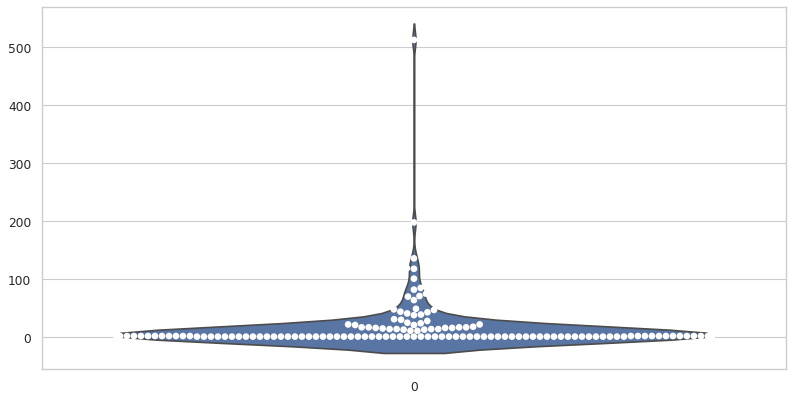

In [ ]:
#plotting all of the "number of drugs" onto a violin plot

sns.set_theme(style="whitegrid")
figure(figsize=(12, 6), dpi=80)
ax = sns.violinplot(data=breast_numDrugs)
sns.swarmplot(data=breast_numDrugs, color="white", edgecolor="gray", size=6)

In [ ]:
#calculating the relative significance of the values above using z scores
breast_wDrugs["ZScores"] = stats.zscore(breast_wDrugs["Number of Drugs"])

print(breast_wDrugs)

       Entry   Entry name    Status  ...  Annotation Number of Drugs   ZScores
2     Q9UNQ0  ABCG2_HUMAN  reviewed  ...  5 out of 5           198.0  4.449846
5     P04155   TFF1_HUMAN  reviewed  ...  5 out of 5             2.0 -0.276724
3071  Q9UM01  YLAT1_HUMAN  reviewed  ...  5 out of 5             3.0 -0.252609
3075  P67936   TPM4_HUMAN  reviewed  ...  5 out of 5             1.0 -0.300839
3077  P35916  VGFR3_HUMAN  reviewed  ...  5 out of 5            14.0  0.012658
...      ...          ...       ...  ...         ...             ...       ...
4258  Q15746   MYLK_HUMAN  reviewed  ...  5 out of 5             1.0 -0.300839
4264  P47712  PA24A_HUMAN  reviewed  ...  5 out of 5            15.0  0.036773
4265  Q96NY8  NECT4_HUMAN  reviewed  ...  5 out of 5             1.0 -0.300839
4268  P42336  PK3CA_HUMAN  reviewed  ...  5 out of 5             7.0 -0.156148
4273  Q15569  TESK1_HUMAN  reviewed  ...  5 out of 5             1.0 -0.300839

[221 rows x 8 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
breast_zscores = pd.DataFrame()
breast_zscores = breast_wDrugs["ZScores"]

b_zscores = breast_zscores.to_numpy()
print(b_zscores)

[ 4.44984554e+00 -2.76724087e-01 -2.52608936e-01 -3.00839239e-01
  1.26577264e-02 -2.76724087e-01 -3.00839239e-01 -2.52608936e-01
 -3.00839239e-01  6.08880287e-02 -2.52608936e-01 -2.76724087e-01
 -3.00839239e-01 -2.04378634e-01 -2.76724087e-01 -2.52608936e-01
 -3.00839239e-01 -3.00839239e-01 -3.00839239e-01 -3.00839239e-01
 -3.00839239e-01 -8.38028782e-02 -3.00839239e-01 -3.00839239e-01
 -2.76724087e-01 -3.00839239e-01 -3.00839239e-01 -3.00839239e-01
 -2.76724087e-01 -2.76724087e-01  1.36310619e+00  3.98500145e-01
 -2.76724087e-01  6.15536505e-01 -2.04378634e-01 -2.28493785e-01
 -3.00839239e-01  6.08880287e-02 -8.38028782e-02  6.63766807e-01
 -2.52608936e-01  1.09118331e-01 -1.56148332e-01 -3.00839239e-01
 -1.80263483e-01 -2.28493785e-01 -1.32033181e-01 -2.76724087e-01
  4.22615296e-01 -2.28493785e-01 -2.52608936e-01 -2.76724087e-01
 -2.76724087e-01 -1.56148332e-01 -3.00839239e-01 -2.52608936e-01
  8.50031798e-02 -2.76724087e-01 -2.28493785e-01 -1.07918029e-01
 -3.00839239e-01 -2.52608

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


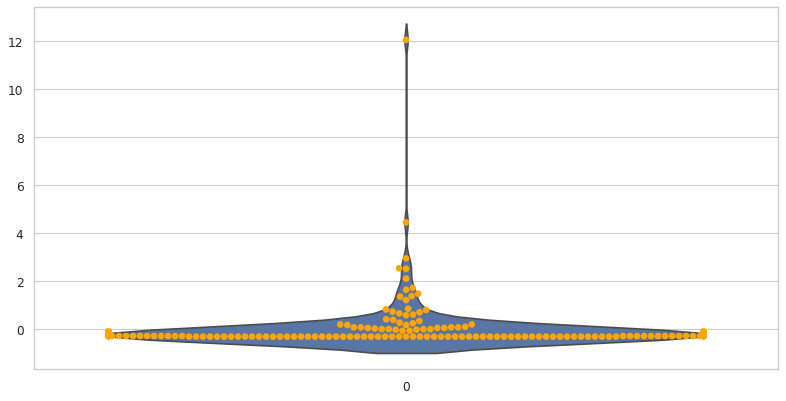

In [ ]:
#plotting all of the zscores onto a violin plot

sns.set_theme(style="whitegrid")
figure(figsize=(12, 6), dpi=80)
ax = sns.violinplot(data=b_zscores)
sns.swarmplot(data=b_zscores, color="orange", edgecolor="gray", size=6)


In [ ]:
#obtaining the number of breast cancer related proteins that were targeted by drugs

len(b_zscores)

221

221 of the 8025 proteins related to breast cancer, as indicated by Uniprot, are targeted by drugs. I wonder how many of these 221 proteins have an "unreviewed" status as determined by Uniprot.


In [ ]:
#this code prints out each protein that is a drug target and their "reviewed" or "unreviewed" status
for index, row in breast_wDrugs.iterrows():
    print(row['Entry'], row['Status'])

Q9UNQ0 reviewed
P04155 reviewed
Q9UM01 reviewed
P67936 reviewed
P35916 reviewed
P09493 reviewed
P51692 reviewed
P63000 reviewed
P10599 reviewed
Q99720 reviewed
P00387 reviewed
P08670 reviewed
P16471 reviewed
P41440 reviewed
Q9ULF5 reviewed
P51168 reviewed
O43175 reviewed
Q9Y2K2 reviewed
Q02809 reviewed
P62745 reviewed
Q9NP99 reviewed
P04275 reviewed
P06753 reviewed
O00444 reviewed
Q06609 reviewed
P23258 reviewed
P61586 reviewed
Q99437 reviewed
P30530 reviewed
P15941 reviewed
O60656 reviewed
P47989 reviewed
Q13885 reviewed
P35968 reviewed
Q03405 reviewed
O15304 reviewed
Q96BR1 reviewed
P11387 reviewed
P30518 reviewed
P06401 reviewed
P28074 reviewed
P17948 reviewed
Q02763 reviewed
Q99758 reviewed
Q13131 reviewed
O14791 reviewed
P07333 reviewed
Q14790 reviewed
P00533 reviewed
Q05397 reviewed
Q8WUI4 reviewed
Q9UQL6 reviewed
P09238 reviewed
Q96J66 reviewed
P60484 reviewed
Q8IVL5 reviewed
O14965 reviewed
Q92506 reviewed
Q15303 reviewed
O14920 reviewed
Q96AZ6 reviewed
P04424 reviewed
P35222 r

In [ ]:
#counting how many unreviewed proteins are drug targets

counter = 0;
for index, row in breast_wDrugs.iterrows():
  if(row["Status"] == "unreviewed"):
      counter = counter + 1;

print("This is how many breast cancer related proteins with an unreviewed status are drug targets: ")
print(counter)

This is how many breast cancer related proteins with an unreviewed status are drug targets: 
0


In [ ]:
#counting how many breast cancer related proteins have "unreviewed" status
counting = 0;

for index, row in breast_df.iterrows():

  if(row["Status"] == "unreviewed"):
    counting = counting + 1;

print("This is how many breast cancer related proteins have a status of unreviewed: ")
print(counting)

This is how many breast cancer related proteins have a status of unreviewed: 
6785


In [ ]:
#counting how many breast cancer related proteins have "reviewed" status
counts = 0;

for index, row in breast_df.iterrows():

  if(row["Status"] == "reviewed"):
    counts = counts + 1;

print("This is how many breast cancer related proteins have a status of reviewed: ")
print(counts)

This is how many breast cancer related proteins have a status of reviewed: 
1240


Now I am a bit curious about these proteins' annotation scores.


In [ ]:
#I want to know how many proteins that were determined to be drug targets have an annotation score of less than 5

how_much = 0;

for index, row in breast_wDrugs.iterrows():

  if not (row["Annotation"] == "5 out of 5"):
    how_much = how_much + 1;

print("This is how many breast cancer related proteins that are drug targets have an annotation score of less than 5: ")
print(how_much)

This is how many breast cancer related proteins that are drug targets have an annotation score of less than 5: 
2


In [ ]:
#creating an easier way to check if a protein is targeted by drugs or not
breast_df.loc[breast_df["Cross-reference (DrugBank)"].isnull(),'value_is_NaN'] = 'Yes'
breast_df.loc[breast_df["Cross-reference (DrugBank)"].notnull(),'value_is_NaN'] = 'No'

print (breast_df)

           Entry       Entry name  ...  Annotation value_is_NaN
0         P51587      BRCA2_HUMAN  ...  5 out of 5          Yes
1         P38398      BRCA1_HUMAN  ...  5 out of 5          Yes
2         Q9UNQ0      ABCG2_HUMAN  ...  5 out of 5           No
3         Q8N163      CCAR2_HUMAN  ...  5 out of 5          Yes
4         Q02297       NRG1_HUMAN  ...  5 out of 5          Yes
...          ...              ...  ...         ...          ...
8020  A0A172S1I6  A0A172S1I6_MMTV  ...  1 out of 5          Yes
8021      D3G8F5      D3G8F5_MMTV  ...  1 out of 5          Yes
8022  A0A172S1C9  A0A172S1C9_MMTV  ...  1 out of 5          Yes
8023      Q2HXY5      Q2HXY5_MMTV  ...  1 out of 5          Yes
8024      D3G8F4      D3G8F4_MMTV  ...  1 out of 5          Yes

[8025 rows x 7 columns]


In [ ]:
#I want to know how many proteins that were not determined to be drug targets have an annotation score of less than 5

how_many = 0;
not_a_target = 0;

for index, row in breast_df.iterrows():

  if (row["value_is_NaN"] == "Yes") and not (row["Annotation"] == "5 out of 5"):
    how_many = how_many + 1;

  if(row["value_is_NaN"] == "Yes"):
    not_a_target = not_a_target + 1;

print("This is how many breast cancer related proteins that are not drug targets that have an annotation score of less than 5: ")
print(how_many)

print("This is how many breast cancer related proteins are not drug targets: ")
print(not_a_target)

This is how many breast cancer related proteins that are not drug targets that have an annotation score of less than 5: 
6972
This is how many breast cancer related proteins are not drug targets: 
7804


This further supports that there is a pretty strong correlation between proteins that have an annotation score less than 5 and their status as a protein that is targeted by drugs. However, this not not mean that proteins with a "5 out of 5" annotation score will be a drug target. 


I would also like to note that the z score analyses were conducted here in this notebook, but the results were not necessary for our prestation or our report. They are not reported in either of these documents. This analysis was only conducted here in this notebook out of interest. 